# Prediction: Most Fours(4s) by the batsman


Statement: Which batsman will hit most Fours in the tournament?

**Data Discription:**
1. 'Player': Name of the cricket player.
1. 'Series': The cricket series in which the match was played.
1. 'date': start date of the ODI.
1. 'Mat': Number of matches played.
1. 'Inns': Number of innings played.
1. 'NO': Number of times the player was not out (no dismissal).
1. 'Runs': Total runs scored by the player in the tournament.
1. 'HS': Highest score in a single inning.
1. 'Avg': Batting average, calculated as Runs/Inns.
1. 'BF': Number of balls faced by the player.
1. 'SR': Batting strike rate, calculated as (Runs/BF) * 100.
1. '100': Number of centuries scored.
1. '50': Number of half-centuries scored.
1. '0': Number of times the player scored zero runs (duck).
1. '4s': Number of fours hit.
1. '6s': Number of sixes hit.
1. 'Afghanistan', 'Australia', 'Bangladesh', 'England', 'India', 'Netherlands', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka': Columns indicating the number of innings played against each respective country in the tournament.
1. 'AVG_Run': This column represents the average runs scored by the player until the previous ODIs played. It is calculated by averaging the 'Avg' column values until the previous ODI.
1. 'AVG_SR': This column represents the average strike rate of the player until the previous ODIs played. It is calculated by averaging the 'SR' column values until the previous ODIs.
1. 'AVG_BF': This column represents the average ball faced(in percentage) by the player until the previous ODIs played.
<br>
How it is calculated ?
<br>
First take the BF in percentage..<br>
number_of_ball_faced/Inns*300 for each row
<br>
then, averaging this new 'BF' column values until the previous ODIs.

In [5]:
#import the required libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from termcolor import colored
import requests
from bs4 import BeautifulSoup
from collections import Counter
pc = ['#FFB6C1', '#FFA07A', '#FFD700', '#98FB98', '#DDA0DD', '#87CEEB', '#F0E68C', '#FFE4E1', '#98FB98', '#FF69B4']

In [6]:
dff = pd.read_csv('Players_ODIwise.csv')

In [7]:
dff.shape

(3118, 30)

In [8]:
dff.columns

Index(['Unnamed: 0', 'Player', 'Series', 'date', 'Mat', 'Inns', 'NO', 'Runs',
       'HS', 'Avg', 'BF', 'SR', '100', '50', '0', '4s', '6s', 'Afghanistan',
       'Australia', 'Bangladesh', 'England', 'India', 'Netherlands',
       'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'AVG_Run',
       'AVG_SR', 'AVG_BF'],
      dtype='object')

## Pre-Processing, Transformation and Feature Engineering

Checking for Null value in the dataset:



In [10]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3118 non-null   int64  
 1   Player        3118 non-null   object 
 2   Series        3118 non-null   object 
 3   date          3118 non-null   object 
 4   Mat           3118 non-null   int64  
 5   Inns          3118 non-null   float64
 6   NO            3118 non-null   object 
 7   Runs          3118 non-null   object 
 8   HS            3118 non-null   object 
 9   Avg           3118 non-null   object 
 10  BF            3118 non-null   float64
 11  SR            3118 non-null   object 
 12  100           3118 non-null   object 
 13  50            3118 non-null   object 
 14  0             3118 non-null   object 
 15  4s            3118 non-null   object 
 16  6s            3118 non-null   object 
 17  Afghanistan   3118 non-null   int64  
 18  Australia     3118 non-null 

Drop the rows which contains the null value


In [11]:
dff.drop(dff[dff['4s'] == '-'].index, inplace=True)

In [12]:
# India
India_team = [
    'Rohit Sharma',
    'Shubman Gill',
    'Virat Kohli',
    'Shreyas Iyer',
    'KL Rahul',
    'Ishan Kishan',
    'Suryakumar Yadav',
    'Hardik Pandya',
    'Prasidh Krishna',
    'Ravindra Jadeja',
    'Axar Pate',
    'Shardul Thakur',
    'Jasprit Bumrah',
    'Kuldeep Yadav',
    'Mohammed Shami',
    'Mohammed Siraj'
    ]

    # Australia
Australia_team = [
    'Pat Cummins',
    'Sean Abbott',
    'Alex Carey',
    'Cameron Green',
    'Josh Hazlewood',
    'Travis Head',
    'Josh Inglis',
    'Marnus Labuschagne',
    'Mitchell Marsh',
    'Glenn Maxwell',
    'Steven Smith',
    'Mitchell Starc',
    'Marcus Stoinis',
    'David Warner',
    'Adam Zampa',
    ]

    # Bangladesh
Bangladesh_team = [
    'Shakib Al Hasan',
    'Litton Das',
    'Najmul Hossain Shanto',
    'Tanzid Hasan',
    'Towhid Hridoy',
    'Mahmudullah Riyad',
    'Mushfiqur Rahim',
    'Mehidy Hasan',
    'Tanzim Sakib',
    'Nasum Ahmed',
    'Shoriful Islam',
    'Hasan Mahmud',
    'Taskin Ahmed',
    'Mustafizur',
    ]
    # New Zealand
NewZealand_team = [
    'Kane Williomson',
    'Trent Boult',
    'Mark Chapman',
    'Devon Conway',
    'Lockie Ferguson',
    'Matt Henry',
    'Kyle Jamieson',
    'Tom Latham',
    'Darly Mitchell',
    'Glenn Phillips',
    'Rachin Ravindra',
    'Mitchell Santner',
    'Ish Sodhi',
    'Tim Southee',
    'Will Young',
    ]
    # Pakistan
Pakistan_team = [
    'Mohammad Babar Azam',
    'Shadab Khan',
    'Abdullah Shafique',
    'Fakhar Zaman',
    'Haris Rauf',
    'Hasan Ali',
    'Iftikhar Ahmed',
    'Imam-ul-Haq',
    'Mohammad Nawaz',
    'Mohammad Rizwan',
    'Mohammad Wasim Jnr',
    'Salman Ali Agha',
    'Saud Shakeel',
    'Shaheen Shah Afridi',
    'Usama Mir',
    ]

    # Sri Lanka
SriLanka_team = [
    'Dasun Shanaka',
    'Chamika Karunaratne',
    'Kusal Mendis',
    'Kusal Perera',
    'Pathum Nissanka',
    'Dimuth Karunaratne',
    'Sadeera Samarawickrama',
    'Charith Asalanka',
    'Dhananjaya de Silva',
    'Dushan Hemantha',
    'Maheesh Theekshana',
    'Dunith Wellalage',
    'Kasun Rajitha',
    'Matheesha Pathirana',
    'Angelo Mathews',
    'Lahiru Kumara',
    'Dushmantha Chameera',
    'Dilshan Madushanka',
    ]
    # South Africa
South_Africa_team = [
    'Temba Bavuma',
    'Gerald Coetzee',
    'Quinton de Kock',
    'Reeza Hendricks',
    'Marco Jansen',
    'Heinrich Klaasen',
    'Keshav Maharaj',
    'Aiden Markram',
    'David Miller',
    'Lungi Ngidi',
    'Andile Phehlukwayo',
    'Kagiso Rabada',
    'Tabraiz Shamsi',
    'Rassie van der Dussen',
    ]
    # Netherlands
Netherlands_team = [
    "Scott Edwards",
    "Max O'Dowd",
    "Bas de Leede",
    "Anil Teja Nidamanuru",
    "Paul Van Meekeren",
    "Colin Niel Ackermann",
    "Roelof Erasmus Van der Merwe",
    "Logan Verjus van Beek",
    "Aryan Dutt",
    "Ryan Klein",
    "Wesley Barresi",
    "M Saqib Zulfiqar",
    "Shariz Ahmad",
    "Sybrand Abraham_Engelbrecht",
    "Vikramjit Singh",
    ]
    # England
England_team = [
    "Joseph Charles Buttler",
    "Moeen_Munir_Ali",
    "Jonathan_Marc_Bairstow",
    "Harry_Cherrington_Brook",
    "Dawid_Johannes_Malan",
    "Joseph_Edward_Root",
    "Brydon_Alexander_Carse",
    "Samuel_Matthew_Curran",
    "Liam_Stephen_Livingstone",
    "Benjamin_Andrew_Stokes",
    "David_Jonathan_Willey",
    "Christopher_Roger_Woakes",
    "Angus_Alexander_Patrick_Atkinson",
    "Adil_Usman_Rashid",
    "Mark_Andrew_Wood",
    "Reece_James_William_Topley",
    ]
    # Afghanistan
Afghanistan_team = [
    'Hashmatullah Shahidi',
    'Rahmanullah Gurbaz',
    'Ibrahim Zadran',
    'Riaz Hasan',
    'Rahmat Shah',
    'Najibullah Zadran',
    'Mohamad Nabi',
     'Ikram Alikhil',
    'Azmatullah Omarzai',
    'Rashid Khan',
    'Mujeeb ur Rahman',
   'Noor Ahmad',
    'Fazalhaq Farooqi',
    'Abdul Rahman',
    'Naveen ul Haq'
    ]

India_team = {player: "india" for player in India_team}
Australia_team = {player: "Australia" for player in Australia_team}
Bangladesh_team = {player: "Bangladesh" for player in Bangladesh_team}
NewZealand_team = {player: "New Zealand" for player in NewZealand_team}
Pakistan_team = {player: "Pakistan" for player in Pakistan_team}
SriLanka_team = {player: "SriLanka" for player in SriLanka_team}
South_Africa_team = {player: "South Africa" for player in South_Africa_team}
Netherlands_team = {player: "Netherlands" for player in Netherlands_team}
England_team = {player: "England" for player in England_team}
Afghanistan_team = {player: "Afghanistan" for player in Afghanistan_team}


# for player, team in India_team.items():
#   print(f"{player} belongs to {team} team.")

all_teams = {}
for team in (India_team, Australia_team, Bangladesh_team, NewZealand_team, Pakistan_team, SriLanka_team, South_Africa_team, Netherlands_team, England_team, Afghanistan_team):
  all_teams.update(team)


Map the Player_name :

In [13]:
for index, value in dff['Player'].items():
    dff.at[index, 'Team'] = all_teams[value]
    dff['Team'] = dff['Player'].map(all_teams)

In [14]:
dff.head()

,Unnamed: 0,Player,Series,date,Mat,Inns,NO,Runs,HS,Avg,...,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,AVG_Run,AVG_SR,AVG_BF,Team
0,0,Virat Kohli,"India in Sri Lanka ODI Series, 2008",18 Aug 2008,5,5.0,0,159,54,31.80,...,0,0,0,0,0,5,31.8000,66.52000,0.159333,india
1,1,Virat Kohli,"Compaq Cup (India, New Zealand, Sri Lanka in S...",14 Sep 2009,1,1.0,1,2,2*,-,...,0,0,0,0,0,1,31.8000,83.26000,0.083000,india
2,2,Virat Kohli,"ICC Champions Trophy (in South Africa), 2009/10",26 Sep 2009,3,2.0,1,95,79*,95.00,...,0,0,0,1,0,0,55.4500,78.73500,0.148167,india
3,3,Virat Kohli,"Australia in India ODI Series, 2009/10",25 Oct 2009,2,2.0,0,40,30,20.00,...,0,0,0,0,0,0,37.7250,74.45250,0.121583,india
4,4,Virat Kohli,"Sri Lanka in India ODI Series, 2009/10",15 Dec 2009,4,3.0,0,188,107,62.66,...,0,0,0,0,0,4,50.1925,84.69625,0.170792,india


In [15]:
new_column_order = ['Player', 'Team', 'Series', 'date', 'Mat', 'Inns', 'NO', 'Runs',
       'HS', 'Avg', 'BF', 'SR', '100', '50', '0', '4s', '6s', 'Afghanistan',
       'Australia', 'Bangladesh', 'England', 'India', 'Netherlands',
       'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'AVG_Run',
       'AVG_SR', 'AVG_BF']

In [16]:
dff = dff[new_column_order]

In [17]:
dff.head()

,Player,Team,Series,date,Mat,Inns,NO,Runs,HS,Avg,...,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,AVG_Run,AVG_SR,AVG_BF
0,Virat Kohli,india,"India in Sri Lanka ODI Series, 2008",18 Aug 2008,5,5.0,0,159,54,31.80,...,0,0,0,0,0,0,5,31.8000,66.52000,0.159333
1,Virat Kohli,india,"Compaq Cup (India, New Zealand, Sri Lanka in S...",14 Sep 2009,1,1.0,1,2,2*,-,...,0,0,0,0,0,0,1,31.8000,83.26000,0.083000
2,Virat Kohli,india,"ICC Champions Trophy (in South Africa), 2009/10",26 Sep 2009,3,2.0,1,95,79*,95.00,...,0,0,0,0,1,0,0,55.4500,78.73500,0.148167
3,Virat Kohli,india,"Australia in India ODI Series, 2009/10",25 Oct 2009,2,2.0,0,40,30,20.00,...,0,0,0,0,0,0,0,37.7250,74.45250,0.121583
4,Virat Kohli,india,"Sri Lanka in India ODI Series, 2009/10",15 Dec 2009,4,3.0,0,188,107,62.66,...,0,0,0,0,0,0,4,50.1925,84.69625,0.170792


Converting Object data type to Numerical by assigning them values using

In [18]:
dff['Team'].unique()

array(['india', 'Australia', 'Bangladesh', 'New Zealand', 'Pakistan',
       'SriLanka', 'South Africa', 'Netherlands', 'England',
       'Afghanistan'], dtype=object)

In [19]:
# this function store the name to integer mapping values
def get_integer_mapping(le):
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})

    return res

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(dff['Player']))
dff['Player'+'_pre'] = dff['Player'].apply(lambda x: le.transform([x])[0])
# print(dff[['Player', 'Player' + '_pre']])
integer_map_player = get_integer_mapping(le)

In [21]:
dff['Player_pre'].unique()

array([150, 134, 119, 133,  58,  51, 136,  39, 107, 114,  11, 130,  52,
        63,  94,  95, 104, 126,   5,  16,  56, 146,  57,  80,  85,  37,
       135,  87,  77,  24,   2, 129,  69, 100, 139, 145,  75,  97,  84,
       140, 101, 132,  43, 141,  98,  60, 147,  78,  27,  70,  82,  66,
       144,  21,  38, 109,  86,  50, 143, 152,  90, 127,   1,  34,  40,
        42,  47,  49,  91,  92,  93, 122, 124, 128, 148,  22,  17,  64,
        65, 105,  30, 121,  18,  28,  32,  74,  31,  61,  81,   7,  67,
        33,  29, 142,  36, 108, 116,  76,  45,  62,   4,  23,  72,   6,
        59, 138, 113, 125,  83,  13,   9, 106,  20, 118,  71,  10, 120,
       151,  73, 131, 137, 149,  54,  88,  53,  41,  26,  55,  15, 123,
        68,  14,  25,  19,   8,   3,  79, 115,  44, 110,  46, 117, 111,
        99,  89,  48,  12, 112,  96, 103,  35,   0, 102])

In [22]:
name_map_player = {v: k for k, v in integer_map_player.items()}

In [25]:
integer_map_player['Ravindra Jadeja']

114

In [28]:
player_name = name_map_player.get(125, "Player not found")
player_name

'Scott Edwards'

In [29]:
le1 = preprocessing.LabelEncoder()
le1.fit(list(dff['Team']))
dff['Team'+'_pre'] = dff['Team'].apply(lambda x: le1.transform([x])[0])
print(dff[['Team', 'Team' + '_pre']])
integer_map_team = get_integer_mapping(le1)

             Team  Team_pre
0           india         9
1           india         9
2           india         9
3           india         9
4           india         9
...           ...       ...
3113  Afghanistan         0
3114  Afghanistan         0
3115  Afghanistan         0
3116  Afghanistan         0
3117  Afghanistan         0

[2881 rows x 2 columns]


In [30]:
name_map_team = {v: k for k, v in integer_map_team.items()}

In [31]:
name_map_team.get(2)

'Bangladesh'

In [32]:
dff['Team_pre'].unique()

array([9, 1, 2, 5, 6, 8, 7, 4, 3, 0])

In [33]:
dff.head()

,Player,Team,Series,date,Mat,Inns,NO,Runs,HS,Avg,...,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,AVG_Run,AVG_SR,AVG_BF,Player_pre,Team_pre
0,Virat Kohli,india,"India in Sri Lanka ODI Series, 2008",18 Aug 2008,5,5.0,0,159,54,31.80,...,0,0,0,0,5,31.8000,66.52000,0.159333,150,9
1,Virat Kohli,india,"Compaq Cup (India, New Zealand, Sri Lanka in S...",14 Sep 2009,1,1.0,1,2,2*,-,...,0,0,0,0,1,31.8000,83.26000,0.083000,150,9
2,Virat Kohli,india,"ICC Champions Trophy (in South Africa), 2009/10",26 Sep 2009,3,2.0,1,95,79*,95.00,...,0,0,1,0,0,55.4500,78.73500,0.148167,150,9
3,Virat Kohli,india,"Australia in India ODI Series, 2009/10",25 Oct 2009,2,2.0,0,40,30,20.00,...,0,0,0,0,0,37.7250,74.45250,0.121583,150,9
4,Virat Kohli,india,"Sri Lanka in India ODI Series, 2009/10",15 Dec 2009,4,3.0,0,188,107,62.66,...,0,0,0,0,4,50.1925,84.69625,0.170792,150,9


In [34]:
dff.drop(dff[dff['Series'] == 'ICC Cricket World Cup (in India), 2023/24'].index, inplace=True)

In [35]:
dff = dff.drop(['Player', 'Team', 'Series', 'date'], axis=1)

In [36]:
dff.head()

,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,...,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,AVG_Run,AVG_SR,AVG_BF,Player_pre,Team_pre
0,5,5.0,0,159,54,31.80,239.0,66.52,0,1,...,0,0,0,0,5,31.8000,66.52000,0.159333,150,9
1,1,1.0,1,2,2*,-,2.0,100.00,0,0,...,0,0,0,0,1,31.8000,83.26000,0.083000,150,9
2,3,2.0,1,95,79*,95.00,128.0,74.21,0,1,...,0,0,1,0,0,55.4500,78.73500,0.148167,150,9
3,2,2.0,0,40,30,20.00,57.0,70.17,0,0,...,0,0,0,0,0,37.7250,74.45250,0.121583,150,9
4,4,3.0,0,188,107,62.66,198.0,94.94,1,1,...,0,0,0,0,4,50.1925,84.69625,0.170792,150,9


In [37]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2741 entries, 0 to 3116
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mat           2741 non-null   int64  
 1   Inns          2741 non-null   float64
 2   NO            2741 non-null   object 
 3   Runs          2741 non-null   object 
 4   HS            2741 non-null   object 
 5   Avg           2741 non-null   object 
 6   BF            2741 non-null   float64
 7   SR            2741 non-null   object 
 8   100           2741 non-null   object 
 9   50            2741 non-null   object 
 10  0             2741 non-null   object 
 11  4s            2741 non-null   object 
 12  6s            2741 non-null   object 
 13  Afghanistan   2741 non-null   int64  
 14  Australia     2741 non-null   int64  
 15  Bangladesh    2741 non-null   int64  
 16  England       2741 non-null   int64  
 17  India         2741 non-null   int64  
 18  Netherlands   2741 non-null 

Some the numeric columns have object datatype. so converting into the numeric


In [38]:
for col in ['Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100', '50', '0', '4s', '6s']:
 dff[col] = pd.to_numeric(dff[col], errors='coerce')

In [39]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2741 entries, 0 to 3116
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mat           2741 non-null   int64  
 1   Inns          2741 non-null   float64
 2   NO            2741 non-null   int64  
 3   Runs          2741 non-null   int64  
 4   HS            2003 non-null   float64
 5   Avg           2468 non-null   float64
 6   BF            2741 non-null   float64
 7   SR            2728 non-null   float64
 8   100           2741 non-null   int64  
 9   50            2741 non-null   int64  
 10  0             2741 non-null   int64  
 11  4s            2741 non-null   int64  
 12  6s            2741 non-null   int64  
 13  Afghanistan   2741 non-null   int64  
 14  Australia     2741 non-null   int64  
 15  Bangladesh    2741 non-null   int64  
 16  England       2741 non-null   int64  
 17  India         2741 non-null   int64  
 18  Netherlands   2741 non-null 

In [40]:
dff.columns

Index(['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100', '50', '0',
       '4s', '6s', 'Afghanistan', 'Australia', 'Bangladesh', 'England',
       'India', 'Netherlands', 'New Zealand', 'Pakistan', 'South Africa',
       'Sri Lanka', 'AVG_Run', 'AVG_SR', 'AVG_BF', 'Player_pre', 'Team_pre'],
      dtype='object')

In [41]:
dff.to_csv('Players_ODIwise_pre.csv')

Drop the features which are not required for the training.

In [42]:
data_df = dff.drop(['NO', 'HS', 'Avg', 'BF', 'SR', 'Runs', '50', '0', '100', '6s'], axis=1)

In [43]:
y_dff = data_df['4s']
new_df = data_df.drop('4s', axis = 1)

In [44]:
data_df.head()

,Mat,Inns,4s,Afghanistan,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,AVG_Run,AVG_SR,AVG_BF,Player_pre,Team_pre
0,5,5.0,21,0,0,0,0,0,0,0,0,0,5,31.8000,66.52000,0.159333,150,9
1,1,1.0,0,0,0,0,0,0,0,0,0,0,1,31.8000,83.26000,0.083000,150,9
2,3,2.0,10,0,1,0,0,0,0,0,1,0,0,55.4500,78.73500,0.148167,150,9
3,2,2.0,4,0,2,0,0,0,0,0,0,0,0,37.7250,74.45250,0.121583,150,9
4,4,3.0,22,0,0,0,0,0,0,0,0,0,4,50.1925,84.69625,0.170792,150,9


In [45]:
new_df.head()

,Mat,Inns,Afghanistan,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,AVG_Run,AVG_SR,AVG_BF,Player_pre,Team_pre
0,5,5.0,0,0,0,0,0,0,0,0,0,5,31.8000,66.52000,0.159333,150,9
1,1,1.0,0,0,0,0,0,0,0,0,0,1,31.8000,83.26000,0.083000,150,9
2,3,2.0,0,1,0,0,0,0,0,1,0,0,55.4500,78.73500,0.148167,150,9
3,2,2.0,0,2,0,0,0,0,0,0,0,0,37.7250,74.45250,0.121583,150,9
4,4,3.0,0,0,0,0,0,0,0,0,0,4,50.1925,84.69625,0.170792,150,9


Find the correlation among features.

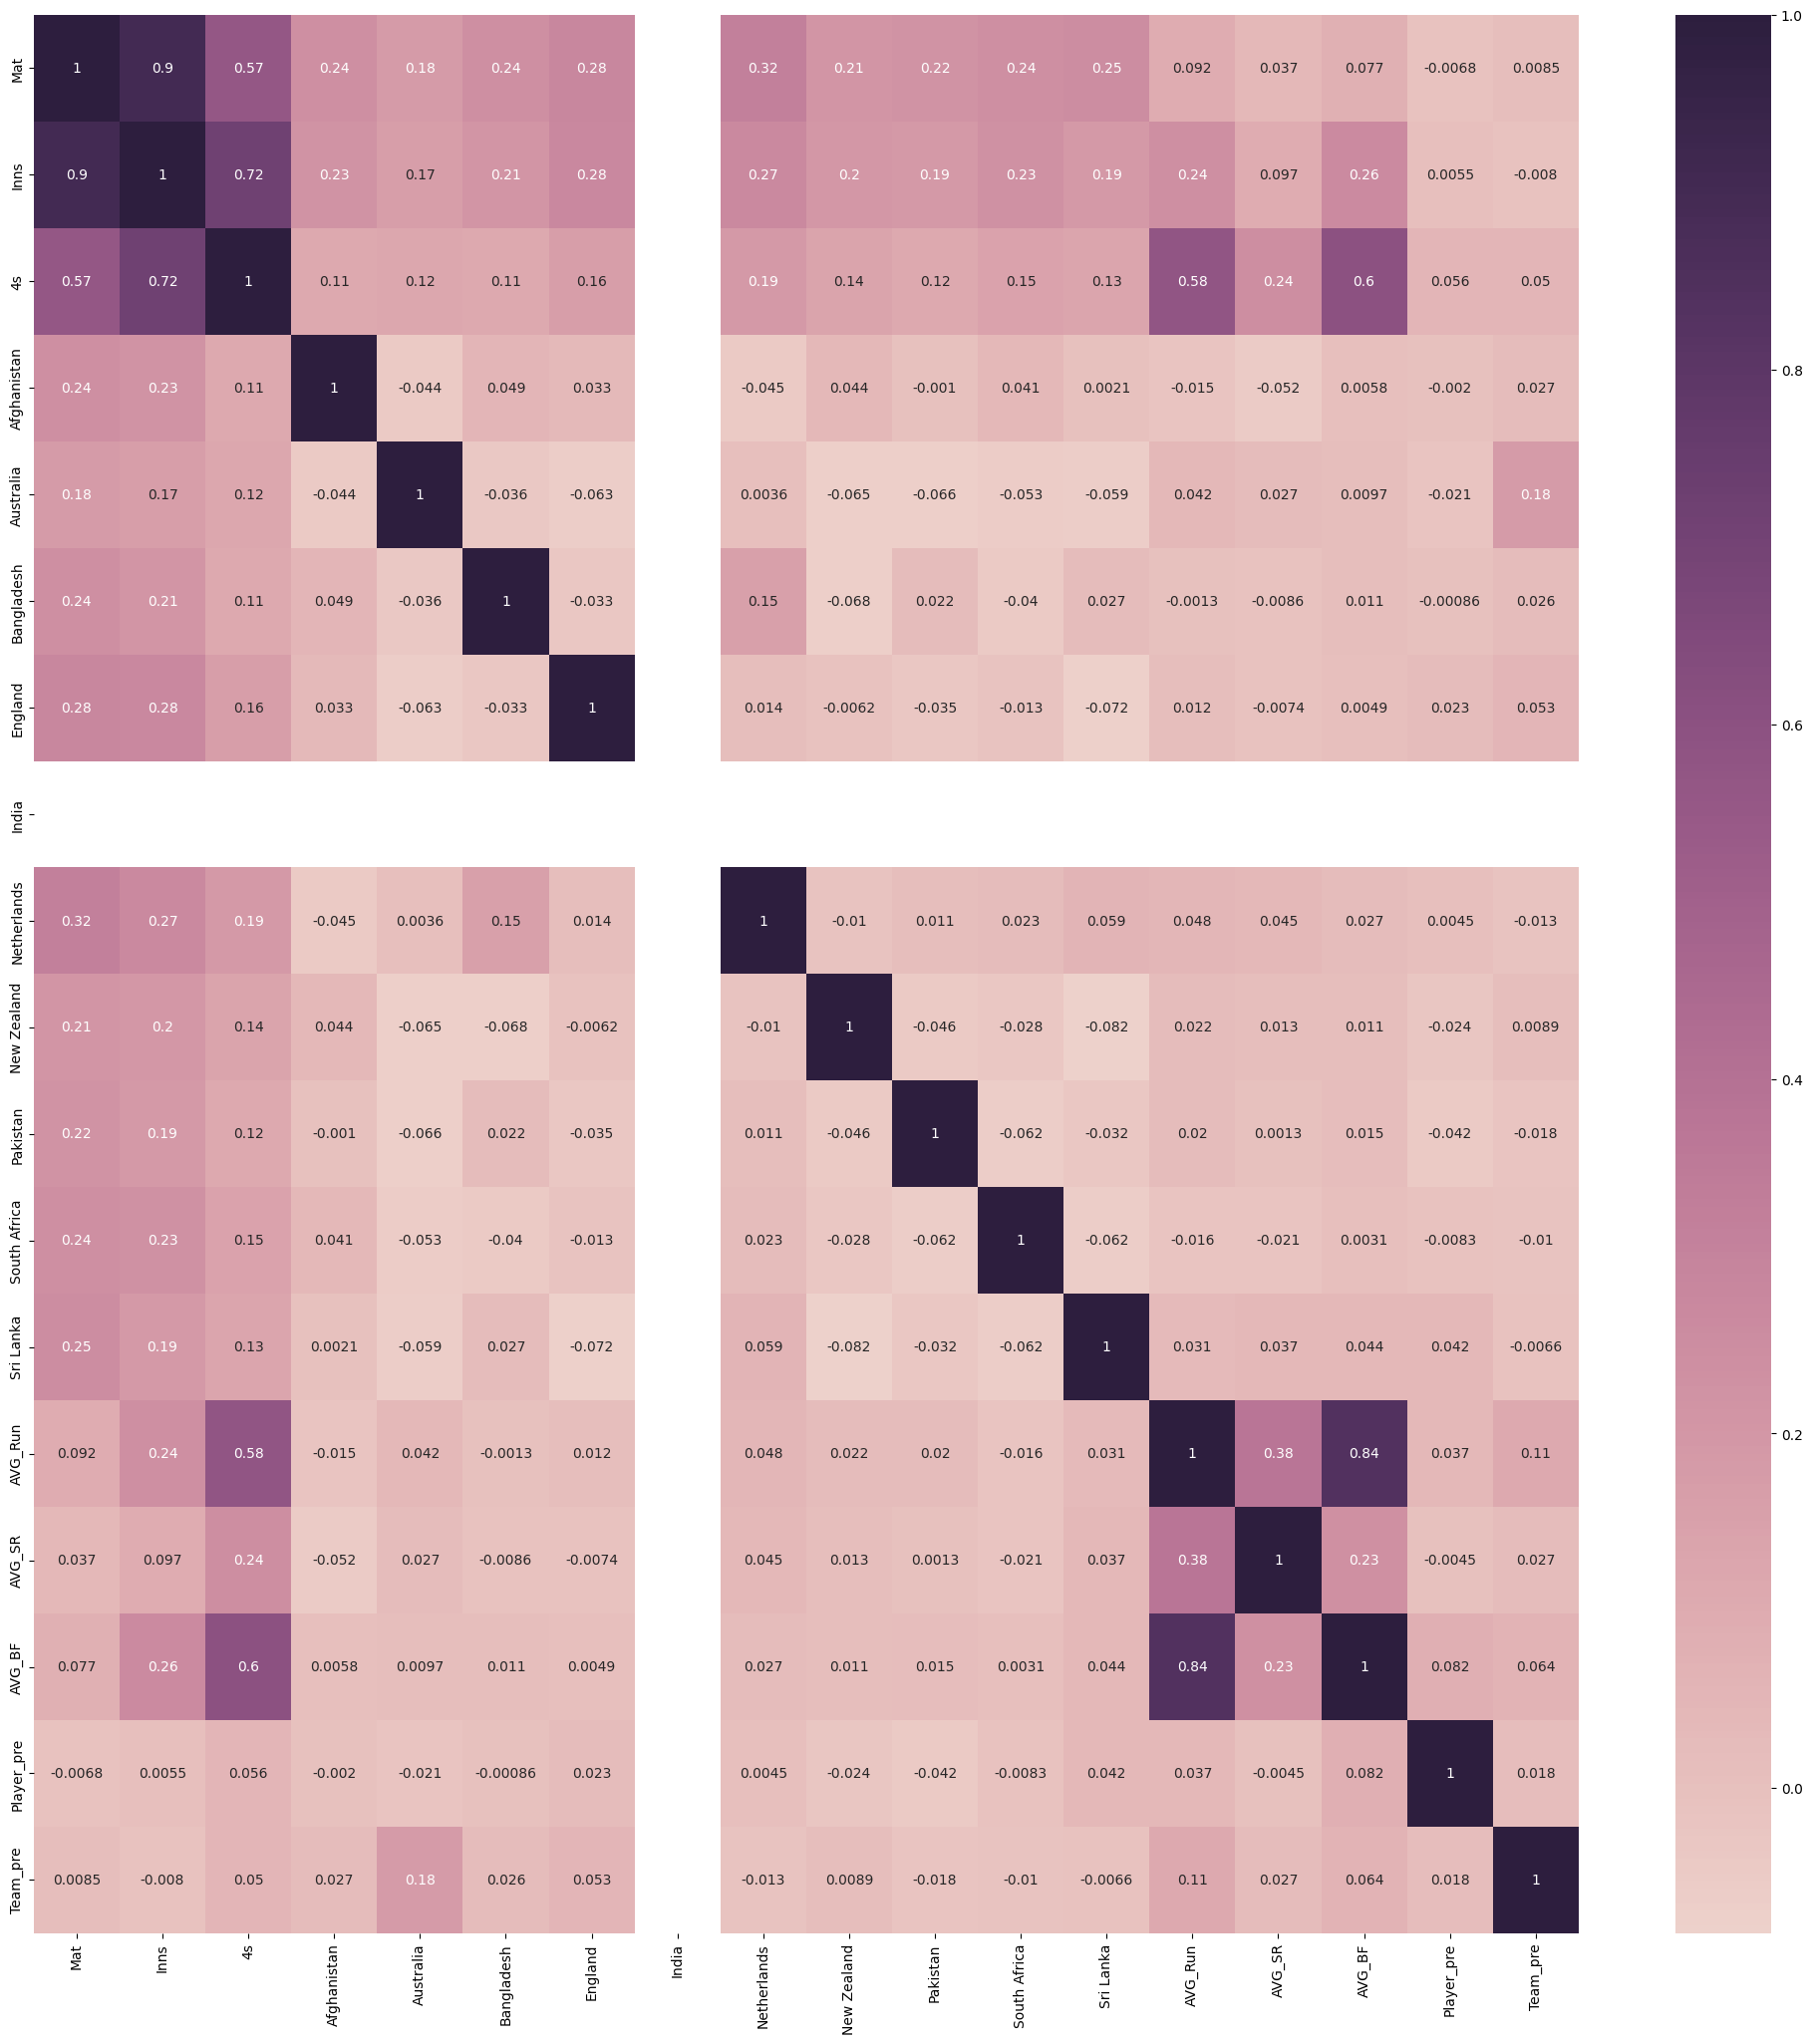

In [46]:
#heat-map
plt.figure(figsize=(25, 25))
sns.heatmap(data_df.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

From heat map, We can clearly see that 4s are hghly corelated with AVG_RUN, AVG_BF,Inns and Match.

## Training the neural network model




We spilt the dataset into trainning and test part.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
x_train, x_test, y_train, y_test = train_test_split(new_df, data_df['4s'], train_size = 0.8, shuffle = True, random_state=42)

In [49]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 549 entries, 404 to 1632
Series name: 4s
Non-Null Count  Dtype
--------------  -----
549 non-null    int64
dtypes: int64(1)
memory usage: 8.6 KB


In [50]:
x_train.shape, x_test.shape

((2192, 17), (549, 17))

scaling of x_train and x_test

In [51]:
standard_scaler = StandardScaler().fit(x_train)

In [52]:
x_train_scaled = standard_scaler.transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

In [53]:
x_train_scaled.shape, x_test_scaled.shape

((2192, 17), (549, 17))

In [54]:
x_train.isnull().sum()

Mat             0
Inns            0
Afghanistan     0
Australia       0
Bangladesh      0
England         0
India           0
Netherlands     0
New Zealand     0
Pakistan        0
South Africa    0
Sri Lanka       0
AVG_Run         0
AVG_SR          0
AVG_BF          0
Player_pre      0
Team_pre        0
dtype: int64

Train the traing set on neural networks:

In [55]:
import tensorflow as tf
from tensorflow import keras

In [56]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr_decay_cb = keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=1, factor=0.5, min_lr=1e-8)

Adding three type of layers in Neural networks:

In [57]:
nn_model = keras.models.Sequential([
#input layer
keras.layers.InputLayer(x_train_scaled.shape[1], ),

#hidden layers
keras.layers.Dense(64, activation="relu"),
keras.layers.Dense(24, activation="relu"),

#output layer
keras.layers.Dense(1, activation="linear")
])


In [58]:
from sklearn.model_selection import StratifiedKFold, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [59]:
nn_model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss = "mse", metrics=["mse"])

In [60]:
history = nn_model.fit(x_train_scaled, y_train, epochs=100, batch_size=50, validation_split=0.20, verbose = 'auto', callbacks=[early_stopping_cb] )

Epoch 1/100
36/36 [==============================] - 1s 9ms/step - loss: 144.7557 - mse: 144.7557 - val_loss: 104.5569 - val_mse: 104.5569
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 93.2128 - mse: 93.2128 - val_loss: 58.7911 - val_mse: 58.7911
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 55.1898 - mse: 55.1898 - val_loss: 37.8102 - val_mse: 37.8102
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 39.3015 - mse: 39.3015 - val_loss: 31.4973 - val_mse: 31.4973
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 33.8027 - mse: 33.8027 - val_loss: 29.0447 - val_mse: 29.0447
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 31.0297 - mse: 31.0297 - val_loss: 27.5417 - val_mse: 27.5417
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 29.0696 - mse: 29.0696 - val_loss: 26.8873 - val_mse: 26.8873
Epoch 8/100
36/36 [==============================] 

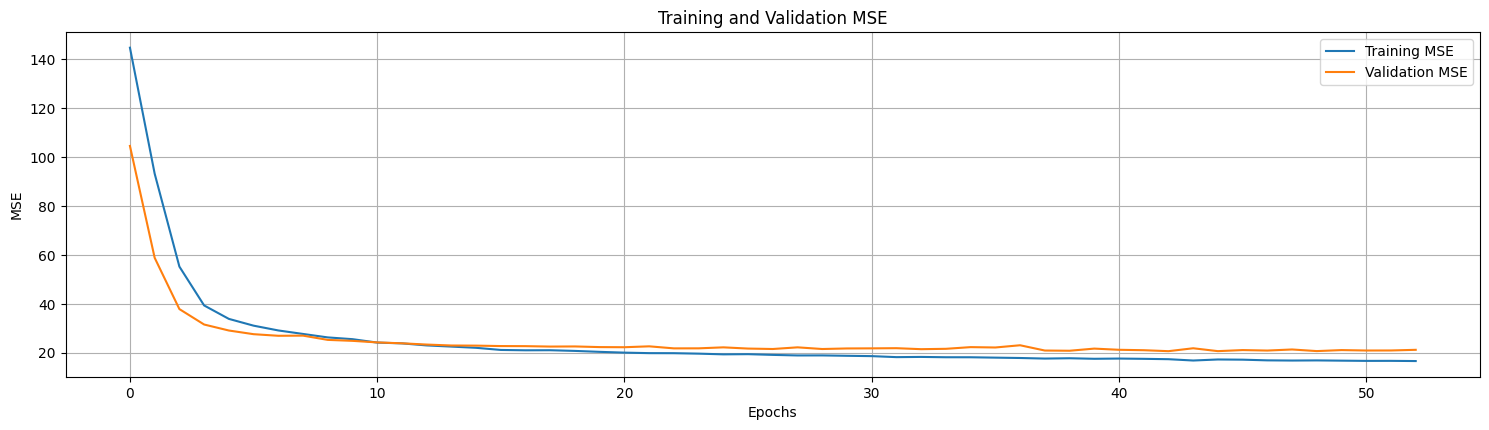

In [61]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 8))

# plot the mse and val_mse
plt.subplot(2, 1, 2)
plt.plot(history_df['mse'], label='Training MSE')
plt.plot(history_df['val_mse'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [62]:
x_test['Prediction'] = nn_model.predict(x_test_scaled)

18/18 [==============================] - 0s 2ms/step


In [63]:
x_test.head()

,Mat,Inns,Afghanistan,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,AVG_Run,AVG_SR,AVG_BF,Player_pre,Team_pre,Prediction
404,1,1.0,0,1,0,0,0,0,0,0,0,0,2.067872,27.156546,0.039871,63,9,0.168330
436,2,1.0,0,0,1,0,0,0,0,0,0,0,5.655373,105.669342,0.019781,94,9,0.834932
1270,3,3.0,0,0,0,0,0,0,0,0,0,0,40.865000,77.000000,0.166171,27,5,10.905572
1538,5,4.0,0,0,0,0,0,0,0,0,0,0,113.433701,80.863425,0.150909,90,6,18.821711
2398,3,3.0,0,0,0,0,0,0,0,3,0,0,32.072695,66.623125,0.156691,13,4,8.648481


In [64]:
from sklearn.metrics import r2_score
score = r2_score(y_test, x_test['Prediction'] )
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 78.0%


## Hyperparameter Tuning using keras_tuner

In [65]:
!pip install keras-tuner
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.4 MB/s eta 0:00:00


In [66]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(x_train_scaled.shape[1],)))


    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                               activation='relu'))
    if hp.Boolean('dropout'):
        model.add(keras.layers.Dropout(rate=0.4))

    model.add(keras.layers.Dense(1, activation='linear'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])

    return model

In [67]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=10,
    executions_per_trial=5,
    overwrite=True,
)

In [68]:
#perform the search for the best hyperparameters
tuner.search(x_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(x_test_scaled, y_test), callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 57s]
val_mean_squared_error: 19.610549926757812

Best val_mean_squared_error So Far: 18.618957901000975
Total elapsed time: 00h 09m 27s


In [69]:
x_test = x_test.drop(['Prediction'], axis=1)

In [71]:
best_nn_model = tuner.get_best_models()[0]

In [72]:
best_nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4608      
                                                                 
 dense_1 (Dense)             (None, 352)               90464     
                                                                 
 dropout (Dropout)           (None, 352)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 353       
                                                                 
Total params: 95425 (372.75 KB)
Trainable params: 95425 (372.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
best_nn_model.evaluate(x_test_scaled, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 18.4700 - mean_squared_error: 18.4700


[18.47004508972168, 18.47004508972168]

In [74]:
x_test['Prediction_bestnnmodel'] = best_nn_model.predict(x_test_scaled)

18/18 [==============================] - 0s 2ms/step


In [75]:
x_test.head()

,Mat,Inns,Afghanistan,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,AVG_Run,AVG_SR,AVG_BF,Player_pre,Team_pre,Prediction_bestnnmodel
404,1,1.0,0,1,0,0,0,0,0,0,0,0,2.067872,27.156546,0.039871,63,9,0.428743
436,2,1.0,0,0,1,0,0,0,0,0,0,0,5.655373,105.669342,0.019781,94,9,0.749596
1270,3,3.0,0,0,0,0,0,0,0,0,0,0,40.865000,77.000000,0.166171,27,5,11.641346
1538,5,4.0,0,0,0,0,0,0,0,0,0,0,113.433701,80.863425,0.150909,90,6,17.866011
2398,3,3.0,0,0,0,0,0,0,0,3,0,0,32.072695,66.623125,0.156691,13,4,7.423973


In [76]:
score1 = r2_score( y_test, x_test['Prediction_bestnnmodel'])
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

The accuracy of our model is 79.0%


## Predicting the century of each player in ICC world cup 2023


In [77]:
predict_input = pd.read_csv('Players_input_data_pre.csv')

In [78]:
predict_input = predict_input.drop(['Unnamed: 0'], axis=1)

In [79]:
predict_input_scaled = standard_scaler.transform(predict_input)

In [80]:
predict_input['Prediction'] = best_nn_model.predict(predict_input_scaled)

5/5 [==============================] - 0s 4ms/step


In [81]:
Player = []
for index, value in predict_input['Player_pre'].iteritems():
    Player.append(name_map_player.get(value, "Player not found"))
predict_input['Player'] = Player

<ipython-input-81-2c688e51e6d2>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in predict_input['Player_pre'].iteritems():


In [82]:
Team = []
for index, value in predict_input['Team_pre'].iteritems():
    Team.append(name_map_team.get(value, "Team not found"))
predict_input['Team'] = Team

<ipython-input-82-68e9f1a096c6>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in predict_input['Team_pre'].iteritems():


In [83]:
predict_input.head()

,Mat,Inns,Afghanistan,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,AVG_Run,AVG_SR,AVG_BF,Player_pre,Team_pre,Prediction,Player,Team
0,9,9,1,1,1,1,0,1,1,1,1,1,78.928966,87.433695,0.202111,150,9,47.185589,Virat Kohli,india
1,9,9,1,1,1,1,0,1,1,1,1,1,56.956642,98.809968,0.173094,134,9,44.327641,Shubman Gill,india
2,9,9,1,1,1,1,0,1,1,1,1,1,56.404904,121.937197,0.148098,119,9,44.888737,Rohit Sharma,india
3,9,9,1,1,1,1,0,1,1,1,1,1,45.065739,107.593676,0.123046,133,9,35.544575,Shreyas Iyer,india
4,9,9,1,1,1,1,0,1,1,1,1,1,64.518696,86.842208,0.154864,58,9,38.194622,KL Rahul,india


In [84]:
top_10_batsmen = predict_input.sort_values(by='Prediction', ascending=False).head(10)
top_10_batsmen = top_10_batsmen[['Player', 'Team', 'Prediction']]
top_10_batsmen

,Player,Team,Prediction
40,Kane Williomson,New Zealand,53.639454
117,Dawid_Johannes_Malan,England,48.445141
0,Virat Kohli,india,47.185589
62,Mohammad Rizwan,Pakistan,45.329617
2,Rohit Sharma,india,44.888737
1,Shubman Gill,india,44.327641
56,Fakhar Zaman,Pakistan,43.940304
87,Quinton de Kock,South Africa,43.629356
92,Aiden Markram,South Africa,43.087704
24,David Warner,Australia,42.711174


Creating Keras File:

In [89]:
from tensorflow.keras.models import model_from_json

# Save the model architecture to a JSON file
model_json = best_nn_model.to_json()
with open("keras_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
best_nn_model.save_weights("P1_keras.h5")


In [90]:
# Load the model architecture from the JSON file
with open("keras_model.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

# Load the model weights
loaded_model.load_weights("P1_keras.h5")


Creating Pickle File:

In [91]:
# Save the entire model to a single HDF5 file
best_nn_model.save("most_fours.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [87]:
#Create a Pickle file using serialization
import pickle
pickle_out = open("most_fours.pkl","wb")
pickle.dump(best_nn_model, pickle_out)
#Serialization
pickle_out.close()

In [88]:
best_nn_model.save('most_fours')